In [7]:
# These are all the modules we'll be using later. Make sure you can import them
# before proceeding further.
from __future__ import print_function
import imageio
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
import tarfile
from IPython.display import display, Image
from sklearn.linear_model import LogisticRegression
from six.moves.urllib.request import urlretrieve
from six.moves import cPickle as pickle

# Config the matplotlib backend as plotting inline in IPython
%matplotlib inline

In [8]:
url = 'https://commondatastorage.googleapis.com/books1000/'
last_percent_reported = None
data_root = '.' # Change me to store data elsewhere

def download_progress_hook(count, blockSize, totalSize):
  """A hook to report the progress of a download. This is mostly intended for users with
  slow internet connections. Reports every 5% change in download progress.
  """
  global last_percent_reported
  percent = int(count * blockSize * 100 / totalSize)

  if last_percent_reported != percent:
    if percent % 5 == 0:
      sys.stdout.write("%s%%" % percent)
      sys.stdout.flush()
    else:
      sys.stdout.write(".")
      sys.stdout.flush()
      
    last_percent_reported = percent
        
def maybe_download(filename, expected_bytes, force=False):
  """Download a file if not present, and make sure it's the right size."""
  dest_filename = os.path.join(data_root, filename)
  if force or not os.path.exists(dest_filename):
    print('Attempting to download:', filename) 
    filename, _ = urlretrieve(url + filename, dest_filename, reporthook=download_progress_hook)
    print('\nDownload Complete!')
  statinfo = os.stat(dest_filename)
  if statinfo.st_size == expected_bytes:
    print('Found and verified', dest_filename)
  else:
    raise Exception(
      'Failed to verify ' + dest_filename + '. Can you get to it with a browser?')
  return dest_filename

train_filename = maybe_download('notMNIST_large.tar.gz', 247336696)
test_filename = maybe_download('notMNIST_small.tar.gz', 8458043)

Attempting to download: notMNIST_large.tar.gz
0%....5%....10%....15%....20%....25%....30%....35%....40%....45%....50%....55%....60%....65%....70%....75%....80%....85%....90%....95%....100%
Download Complete!
Found and verified ./notMNIST_large.tar.gz
Attempting to download: notMNIST_small.tar.gz
0%....5%....10%....15%....20%....25%....30%....35%....40%....45%....50%....55%....60%....65%....70%....75%....80%....85%....90%....95%....100%
Download Complete!
Found and verified ./notMNIST_small.tar.gz


In [9]:
num_classes = 10
np.random.seed(133)

def maybe_extract(filename, force=False):
  root = os.path.splitext(os.path.splitext(filename)[0])[0]  # remove .tar.gz
  if os.path.isdir(root) and not force:
    # You may override by setting force=True.
    print('%s already present - Skipping extraction of %s.' % (root, filename))
  else:
    print('Extracting data for %s. This may take a while. Please wait.' % root)
    tar = tarfile.open(filename)
    sys.stdout.flush()
    tar.extractall(data_root)
    tar.close()
  data_folders = [
    os.path.join(root, d) for d in sorted(os.listdir(root))
    if os.path.isdir(os.path.join(root, d))]
  if len(data_folders) != num_classes:
    raise Exception(
      'Expected %d folders, one per class. Found %d instead.' % (
        num_classes, len(data_folders)))
  print(data_folders)
  return data_folders
  
train_folders = maybe_extract(train_filename)
test_folders = maybe_extract(test_filename)

Extracting data for ./notMNIST_large. This may take a while. Please wait.
['./notMNIST_large/A', './notMNIST_large/B', './notMNIST_large/C', './notMNIST_large/D', './notMNIST_large/E', './notMNIST_large/F', './notMNIST_large/G', './notMNIST_large/H', './notMNIST_large/I', './notMNIST_large/J']
Extracting data for ./notMNIST_small. This may take a while. Please wait.
['./notMNIST_small/A', './notMNIST_small/B', './notMNIST_small/C', './notMNIST_small/D', './notMNIST_small/E', './notMNIST_small/F', './notMNIST_small/G', './notMNIST_small/H', './notMNIST_small/I', './notMNIST_small/J']


In [23]:
import random 
def display_images(data_folders, size):
    for folder in data_folders:
        print(folder)
        images_files = os.listdir(folder)
        images_samples = random.sample(images_files,size) 
        for image in images_samples:
            print(image)
            i = Image(filename=os.path.join(folder,image))
            display(i)

In [25]:
#display_images(train_folders,3)
display_images(test_folders,4)

./notMNIST_small/A
Q2hhcnRlciBJVEMgSXRhbGljIEJULnR0Zg==.png


R2lzaGEudHRm.png


Q29udGludXVtIEJvbGQudHRm.png


Q2FydG9vbiBXaWRlLnR0Zg==.png


./notMNIST_small/B
RHV0Y2g4MDlCVC1Sb21hbkMub3Rm.png


Q2FzbG9uVHdvVHdlbnR5Rm91ci1CbGFja0l0Lm90Zg==.png


Q3Jvc2J5c0hhbmQudHRm.png


R2FydGhHcmFwaGljU3RkLUV4dHJhQm9sZC5vdGY=.png


./notMNIST_small/C
QnJvYWR3YXlNVFN0ZC5vdGY=.png


R2xvc3NhcnkgQmxhY2sgU1NpIEJsYWNrLnR0Zg==.png


Q2xlcmZhY2UtQm9sZEl0YS5vdGY=.png


QmVsbENlbnQgU3ViQ2FwIEJUIFN1Yi1DYXB0aW9uLnR0Zg==.png


./notMNIST_small/D
RGFya1dpbmQgQ29uZGVuc2VkIEl0YWxpYy50dGY=.png


RHVwdXlIZWF2eSBSZWd1bGFyLnR0Zg==.png


QnJhbmRvIENvbmRlbnNlZCBOb3JtYWwudHRm.png


SG9sbWVzMDAxLnR0Zg==.png


./notMNIST_small/E
Q29seW1waWEtRGVtaUJvbGQub3Rm.png


OEJhbGxTY3JpcHRTQ2Fwc1NTSyBJdGFsaWMudHRm.png


RFRMQ2FzcGFyaVNULUJvbGQub3Rm.png


QWRyZW5hbGluLm90Zg==.png


./notMNIST_small/F
RHluYW1vUnhjSXRhbGljSFhDLm90Zg==.png


RGlkb3QtSFRGLUI5Ni1Cb2xkLUl0YWwub3Rm.png


SG9uZGEgUmVndWxhci50dGY=.png


RWx3b29kLnR0Zg==.png


./notMNIST_small/G
Rm9yZXN0U2hhZGVkU3RkLm90Zg==.png


RmlsbSBDcnlwdGljIE9ibGlxdWUudHRm.png


RnJlZXplciBCVE4gQ29uZGVuc2VkIE9ibGlxdWUudHRm.png


Rm9yZWxsZS50dGY=.png


./notMNIST_small/H
R3VuaGVhZCBDaGljay50dGY=.png


QmFza2VydmlsbGVCVC1Sb21hbi5vdGY=.png


RGF2aWxsZSBDb25kZW5zZWQgU2xhbnRlZC50dGY=.png


Q2hpbGQncyBQbGF5LnR0Zg==.png


./notMNIST_small/I
R2lsbFNhbnNNVFN0ZC1Cb2xkLm90Zg==.png


SGVyYWxkR290aGljLU1lZGl1bS5vdGY=.png


QnVzdGVyLUJvbGRDb25kZW5zZWQub3Rm.png


RGFsZXlzR290aGljLUJsYWNrLm90Zg==.png


./notMNIST_small/J
RGlkb3QtSFRGLUwyNC1MaWdodC1JdGFsLm90Zg==.png


QmFieSBLcnVmZnkudHRm.png


RGVjRXBpY3VyZS5vdGY=.png


QmVsbENlbnRlbm5pYWwtTmFtZUFuZE51bWJlci5vdGY=.png


In [26]:
image_size = 28  # Pixel width and height.
pixel_depth = 255.0  # Number of levels per pixel.

def load_letter(folder, min_num_images):
  """Load the data for a single letter label."""
  image_files = os.listdir(folder)
  dataset = np.ndarray(shape=(len(image_files), image_size, image_size),
                         dtype=np.float32)
  print(folder)
  num_images = 0
  for image in image_files:
    image_file = os.path.join(folder, image)
    try:
      image_data = (imageio.imread(image_file).astype(float) - 
                    pixel_depth / 2) / pixel_depth
      if image_data.shape != (image_size, image_size):
        raise Exception('Unexpected image shape: %s' % str(image_data.shape))
      dataset[num_images, :, :] = image_data
      num_images = num_images + 1
    except (IOError, ValueError) as e:
      print('Could not read:', image_file, ':', e, '- it\'s ok, skipping.')
    
  dataset = dataset[0:num_images, :, :]
  if num_images < min_num_images:
    raise Exception('Many fewer images than expected: %d < %d' %
                    (num_images, min_num_images))
    
  print('Full dataset tensor:', dataset.shape)
  print('Mean:', np.mean(dataset))
  print('Standard deviation:', np.std(dataset))
  return dataset

def maybe_pickle(data_folders, min_num_images_per_class, force=False):
  dataset_names = []
  for folder in data_folders:
    set_filename = folder + '.pickle'
    dataset_names.append(set_filename)
    if os.path.exists(set_filename) and not force:
      # You may override by setting force=True.
      print('%s already present - Skipping pickling.' % set_filename)
    else:
      print('Pickling %s.' % set_filename)
      dataset = load_letter(folder, min_num_images_per_class)
      try:
        with open(set_filename, 'wb') as f:
          pickle.dump(dataset, f, pickle.HIGHEST_PROTOCOL)
      except Exception as e:
        print('Unable to save data to', set_filename, ':', e)
  
  return dataset_names

train_datasets = maybe_pickle(train_folders, 45000)
test_datasets = maybe_pickle(test_folders, 1800)

Pickling ./notMNIST_large/A.pickle.
./notMNIST_large/A
Could not read: ./notMNIST_large/A/Um9tYW5hIEJvbGQucGZi.png : Could not find a format to read the specified file in mode 'i' - it's ok, skipping.
Could not read: ./notMNIST_large/A/SG90IE11c3RhcmQgQlROIFBvc3Rlci50dGY=.png : Could not find a format to read the specified file in mode 'i' - it's ok, skipping.
Could not read: ./notMNIST_large/A/RnJlaWdodERpc3BCb29rSXRhbGljLnR0Zg==.png : Could not find a format to read the specified file in mode 'i' - it's ok, skipping.
Full dataset tensor: (52909, 28, 28)
Mean: -0.12825
Standard deviation: 0.443121
Pickling ./notMNIST_large/B.pickle.
./notMNIST_large/B
Could not read: ./notMNIST_large/B/TmlraXNFRi1TZW1pQm9sZEl0YWxpYy5vdGY=.png : Could not find a format to read the specified file in mode 'i' - it's ok, skipping.
Full dataset tensor: (52911, 28, 28)
Mean: -0.00756303
Standard deviation: 0.454491
Pickling ./notMNIST_large/C.pickle.
./notMNIST_large/C
Full dataset tensor: (52912, 28, 28)
M

In [62]:
import random
def display_sample_pickle(data_folders):
   selected_folder = random.sample(data_folders,1)
   print(selected_folder)
   pickle_file = ''.join(selected_folder) + '.pickle'
   try:
        with open(pickle_file,'rb') as f:
            dataset = pickle.load(f)
   except Exception as e:
        print("unable to  load file ", pickle_file,'-',e)
   plt.suptitle(''.join(selected_folder)[-1])   
   for i, image in enumerate(random.sample(list(dataset),8)):
        plt.subplot(2,4,i+1)
        #plt.axis('off')
        plt.imshow(image)

['./notMNIST_large/B']


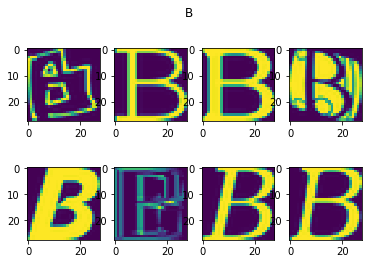

In [63]:
display_sample_pickle(train_folders)

['./notMNIST_small/B']


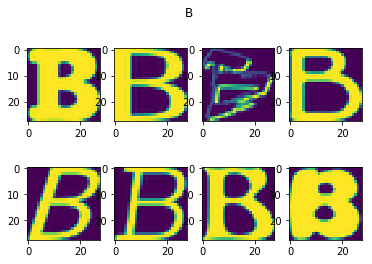

In [65]:
display_sample_pickle(test_folders)

In [73]:
def display_number_items(data_folders):
    for folder in data_folders:
        folder_pickle = ''.join(folder) + '.pickle'
        try:
            with open(folder_pickle,'rb') as f:
                dataset = pickle.load(f)
        except exception as e:
            print('unable to load file ', folder_pickle, e)
        print(folder_pickle)
        print("number of items is :", len(dataset))

In [74]:
display_number_items(train_folders)

./notMNIST_large/A.pickle
number of items is : 52909
./notMNIST_large/B.pickle
number of items is : 52911
./notMNIST_large/C.pickle
number of items is : 52912
./notMNIST_large/D.pickle
number of items is : 52911
./notMNIST_large/E.pickle
number of items is : 52912
./notMNIST_large/F.pickle
number of items is : 52912
./notMNIST_large/G.pickle
number of items is : 52912
./notMNIST_large/H.pickle
number of items is : 52912
./notMNIST_large/I.pickle
number of items is : 52912
./notMNIST_large/J.pickle
number of items is : 52911


In [76]:
display_number_items(test_folders)

./notMNIST_small/A.pickle
number of items is : 1872
./notMNIST_small/B.pickle
number of items is : 1873
./notMNIST_small/C.pickle
number of items is : 1873
./notMNIST_small/D.pickle
number of items is : 1873
./notMNIST_small/E.pickle
number of items is : 1873
./notMNIST_small/F.pickle
number of items is : 1872
./notMNIST_small/G.pickle
number of items is : 1872
./notMNIST_small/H.pickle
number of items is : 1872
./notMNIST_small/I.pickle
number of items is : 1872
./notMNIST_small/J.pickle
number of items is : 1872


In [81]:
def make_arrays(nb_rows, img_size):
  if nb_rows:
    dataset = np.ndarray((nb_rows, img_size, img_size), dtype=np.float32)
    labels = np.ndarray(nb_rows, dtype=np.int32)
  else:
    dataset, labels = None, None
  return dataset, labels

In [82]:
def merge_datasets(pickle_files, train_size, valid_size=0):
  num_classes = len(pickle_files)
  valid_dataset, valid_labels = make_arrays(valid_size, image_size)
  train_dataset, train_labels = make_arrays(train_size, image_size)
  vsize_per_class = valid_size // num_classes
  tsize_per_class = train_size // num_classes
    
  start_v, start_t = 0, 0
  end_v, end_t = vsize_per_class, tsize_per_class
  end_l = vsize_per_class+tsize_per_class
  for label, pickle_file in enumerate(pickle_files):       
    try:
      with open(pickle_file, 'rb') as f:
        letter_set = pickle.load(f)
        # let's shuffle the letters to have random validation and training set
        np.random.shuffle(letter_set)
        if valid_dataset is not None:
          valid_letter = letter_set[:vsize_per_class, :, :]
          valid_dataset[start_v:end_v, :, :] = valid_letter
          valid_labels[start_v:end_v] = label
          start_v += vsize_per_class
          end_v += vsize_per_class
                    
        train_letter = letter_set[vsize_per_class:end_l, :, :]
        train_dataset[start_t:end_t, :, :] = train_letter
        train_labels[start_t:end_t] = label
        start_t += tsize_per_class
        end_t += tsize_per_class
    except Exception as e:
      print('Unable to process data from', pickle_file, ':', e)
      raise
    
  return valid_dataset, valid_labels, train_dataset, train_labels

In [83]:
train_size = 100000
valid_size = 10000
test_size = 10000

valid_dataset, valid_labels, train_dataset, train_labels = merge_datasets(
  train_datasets, train_size, valid_size)
_, _, test_dataset, test_labels = merge_datasets(test_datasets, test_size)

print('Training:', train_dataset.shape, train_labels.shape)
print('Validation:', valid_dataset.shape, valid_labels.shape)
print('Testing:', test_dataset.shape, test_labels.shape)

Training: (100000, 28, 28) (100000,)
Validation: (10000, 28, 28) (10000,)
Testing: (10000, 28, 28) (10000,)


In [85]:
def randomize(dataset, labels):
  permutation = np.random.permutation(labels.shape[0])
  shuffled_dataset = dataset[permutation,:,:]
  shuffled_labels = labels[permutation]
  return shuffled_dataset, shuffled_labels
train_dataset, train_labels = randomize(train_dataset, train_labels)
test_dataset, test_labels = randomize(test_dataset, test_labels)
valid_dataset, valid_labels = randomize(valid_dataset, valid_labels)

In [91]:
pretty_labels = {0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I', 9: 'J'}
def display_data(dataset,labels):
    items = random.sample(range(len(labels)),7)
    for i,item in enumerate(items):
        plt.subplot(2, 4, i+1)
        plt.axis('off')
        plt.title(pretty_labels[labels[item]])
        plt.imshow(dataset[item])

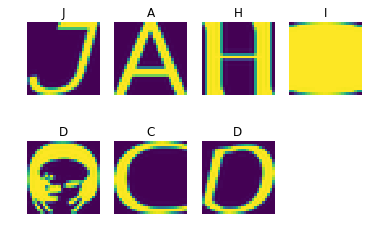

In [97]:
display_data(train_dataset,train_labels)


In [103]:
pickle_file = "notMNIST.pickle"

try:
    f =  open(pickle_file,'wb')
    save =  {
            'train_dataset': train_dataset,
            'train_labels': train_labels,
            'valid_dataset': valid_dataset,
            'valid_labels': valid_labels,
            'test_dataset': test_dataset,
            'test_labels': test_labels,
        }
    pickle.dump(save,f,pickle.HIGHEST_PROTOCOL)
    f.close()
except Exception as e:
    print("unable to save pickle file",e)

In [105]:
statinfo = os.stat(pickle_file)
print("compressed file size :", statinfo.st_size)

compressed file size : 376800506
